# IT326: Data mining project
# Phase#3:

First, we'll assess whether our dataset is balanced or imbalanced. In Phase 2, after preprocessing our dataset, we'll proceed with applying classification and clustering methods. Finally, we'll evaluate the performance of these methods.

Import libraries:


In [2]:
import warnings
warnings.filterwarnings("ignore")

%pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Balance Data:

### - Check if the data is balanced or not:

In [3]:
import pandas as pd

df = pd.read_csv("Dataset/Preprocessed_dataset.csv",sep=",")
x = df['Adaptivity Level']

num_high = x[x == 0].count()
num_moderate = x[x == 2].count()
num_low = x[x == 1].count()

total = num_high + num_moderate + num_low
percentage_high = (num_high / total) * 100
percentage_moderate = (num_moderate / total) * 100
percentage_low = (num_low / total) * 100

print("Number of high :", num_high)
print("Number of moderate :", num_moderate)
print("Number of low :", num_low)
print("___")
print("Percentage of high : {:.2f}%".format(percentage_high))
print("Percentage of moderate : {:.2f}%".format(percentage_moderate))
print("Percentage of low : {:.2f}%".format(percentage_low))

Number of high : 24
Number of moderate : 118
Number of low : 114
___
Percentage of high : 9.38%
Percentage of moderate : 46.09%
Percentage of low : 44.53%


In the beginning, we reviewed the percentage for each of the two classes in the Liver Class (Liver patients, Non-liver patients), and we noticed that the percentage is imbalanced (not ranging between 40% to 60%).

### - Process of correcting data balancing:

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

encoder = LabelEncoder()

df['Adaptivity Level_Binary'] = df['Adaptivity Level'].apply(lambda x: 1 if x in [0, 2] else 0)
df['Adaptivity Level_Binary'] = encoder.fit_transform(df['Adaptivity Level_Binary'])

X = df.drop('Adaptivity Level_Binary', axis=1)
y = df['Adaptivity Level_Binary']

# Oversample the "Low" class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled X and y into a single DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Adaptivity Level'] = y_resampled

# Print the new distribution of the target variable
print(pd.Series(y_resampled).value_counts())

# dave the processed dataset into hard drive
df.to_csv('Dataset\Processed_dataset.csv', index=False)

ValueError: could not convert string to float: 'Boy'

### - Data after the balancing process:

## Loading data:
View data to determine the Class Label and its location

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

df = pd.read_csv("Dataset/Processed_dataset.csv")
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,0.8,University,Non Government,0,1,Low,Mid,Wifi,4G,3 hours,No,Tab,Moderate
1,Girl,0.8,University,Non Government,0,1,High,Mid,Mobile Data,4G,2 hours,Yes,Mobile,Moderate
2,Girl,0.6,College,Government,0,1,Low,Mid,Wifi,4G,2 hours,No,Mobile,Moderate
3,Girl,0.4,School,Non Government,0,1,Low,Mid,Mobile Data,4G,2 hours,No,Mobile,Moderate
4,Girl,0.6,School,Non Government,0,1,Low,Poor,Mobile Data,3G,No class,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,0.8,University,Non Government,1,0,High,Mid,Mobile Data,3G,3 hours,No,Computer,Low
252,Boy,0.6,College,Government,0,1,Low,Mid,Mobile Data,3G,2 hours,No,Mobile,Moderate
253,Girl,0.6,College,Non Government,0,0,Low,Mid,Mobile Data,3G,2 hours,Yes,Mobile,Low
254,Boy,0.8,University,Non Government,1,0,High,Mid,Mobile Data,3G,2 hours,Yes,Mobile,Moderate


## Feature Selection:

# Data Mining Technique


## Classification

We’ll run experiments to identify the best way to divide our dataset into training and testing sets. This approach will allow us to determine the ideal ratio, ensuring accurate and dependable model evaluation.
### Splitting Data into:



>### 1- Splitting Data into: 70% Training and 30% Test

### Information Gain (entropy):

- Confusion matrix:

- Decision Tree:

+ Splitting evaluation :

### Gini Index:

- Confusion matrix:

- Decision Tree:

+ Splitting evaluation :

>### 2- Splitting Data into: 60% Training and 40% Test

### Information Gain (entropy):

- Confusion matrix:

- Decision Tree:

+ Splitting evaluation :

### Gini Index:

- Confusion matrix:

- Decision Tree:

+ Splitting evaluation :

>### <h2>3- Splitting Data into: 80% Training and 20% Test</h2>

###<b> Information Gain (entropy):

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

NameError: name 'X' is not defined

- Confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Decision Tree:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

+ Splitting evaluation :

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

+ Accuracy:

+ Error Rate:

+ Sensitivity (True Positive Rate):

+ Specificity (True Negative Rate):

+ Precision (Positive Predictive Value):

###<b> Gini Index:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='gini')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Decision Tree:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

+ Splitting evaluation :

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

+ Accuracy:

+ Error Rate:

+ Sensitivity (True Positive Rate):

+ Specificity (True Negative Rate):

+ Precision (Positive Predictive Value):

### Evaluate the models of<b> information Gain :

<table border="1">
  <thead>
    <tr>
      <th>Metric</th>
      <th>70% Training, 30% Testing</th>
      <th>60% Training, 40% Testing</th>
      <th>80% Training, 20% Testing</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Error Rate</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Sensitivity</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Specificity</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Precision</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table>


### Evaluate the models of <b>Gini Index:

<table border="1">
  <thead>
    <tr>
      <th>Metric</th>
      <th>70% Training, 30% Testing</th>
      <th>60% Training, 40% Testing</th>
      <th>80% Training, 20% Testing</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Error Rate</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Sensitivity</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Specificity</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Precision</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table>


### The best model between information gain and the Gini index:

## Clustering

Clustering is an unsupervised learning task that does not require labeled data. Therefore, we will remove the "Adaptivity Level" class label from the dataset, as it is unnecessary for the clustering process. Since our dataset consists solely of numeric attributes, additional encoding for other data types is not required.

Following the removal of the "Adaptivity Level" label, the next step is to scale the attributes to standardize them. This scaling ensures that all attributes are on comparable scales, preventing any single attribute from disproportionately influencing the clustering process due to differences in magnitude.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
df = pd.read_csv("/content/Processed_dataset_numeric.csv")

# Extract the features (excluding the target variable, if any)
features = df.drop('Adaptivity Level', axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Create a new DataFrame with the scaled features

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())

### K-means Clustering

The K-means clustering algorithm is an unsupervised machine learning technique used to divide a dataset into K unique clusters based on similarity. It allocates each data point to the nearest cluster center (centroid) and iteratively refines the centroids to minimize the sum of squared distances within each cluster.

**Selecting Three Different Sizes for K-means Clustering :**
We will determine three distinct values for K based on the results of validation methods we apply. These values will then be used to perform K-means clustering. One value will be relatively large, another moderate, and the last one smaller. This approach aims to cover a range of possibilities, helping us identify the best potential clustering outcomes.

### Silhouette method

The Silhouette method evaluates clustering quality by measuring how well each data point aligns with its cluster compared to others. Scores range from -1 to 1, with higher values indicating clearer, more distinct clusters, helping to find the optimal number of clusters.

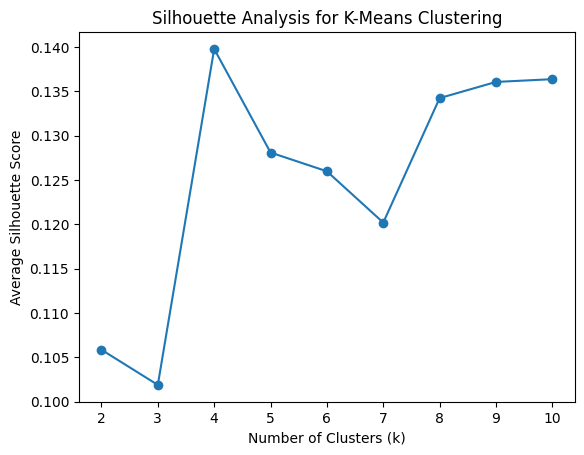

The highest average Silhouette score is 0.13978657901042923 with k=4.
The second highest average Silhouette score is 0.136374511950154 with k=10.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_values = range(2, 11)
silhouette_avg_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)


best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)


silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]


plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()


print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


as you can see above We found that the optimal number of clusters (k) maximizing the average Silhouette coefficient is 4 , which will be our first k-means choice.

### Elbow method

The Elbow method helps identify the optimal number of clusters for K-means by plotting the within-cluster sum of squares (inertia) against the number of clusters. The “elbow” point indicates where adding more clusters yields minimal reduction in inertia, balancing compactness and avoiding overfitting.

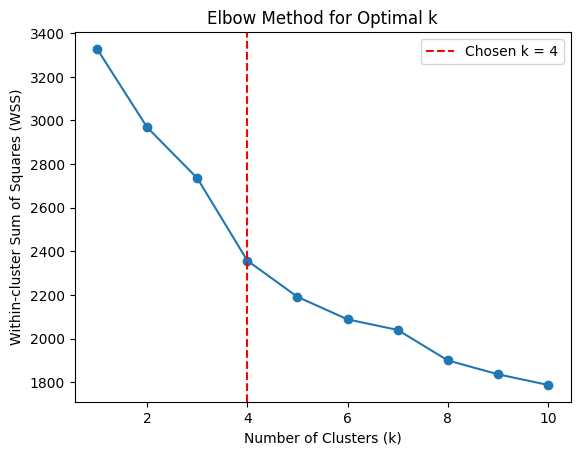

The optimal number of clusters based on Elbow Method is k = 4


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator


X_scaled = df_scaled


k_values = range(1, 11)
wss_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.inertia_)


plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')


knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow


plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


print(f"The optimal number of clusters based on Elbow Method is k = {turning_point}")


Since we are required to select three values for K, we have chosen
k = 3, k = 4, and k = 10 based on our analysis. The value  k = 4 achieves the highest average Silhouette coefficient and is considered the optimal choice for well-defined and compact clusters. The value k = 10  that corresponds to the second-highest average Silhouette coefficient, Finally k = 3 was selected to experiment with a smaller number of clusters, allowing us to explore a broader range of cluster formations and compare the performance of each configuration.

### k-means clustering, visualization, and evaluation:

In this section, we will apply K-means clustering using three predetermined values for K and visualize the outcomes. We will then assess the clustering quality by computing WSS, Bcubed precision and recall, and the average Silhouette score for each cluster.

 K=3

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


np.random.seed(45)


kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
kmeans_result = kmeans.fit(scaled_features)

print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


Cluster Centers:
[[ 0.05694948  0.12015    -0.34034051 -0.83565399 -0.44470702 -1.45797073
  -0.30000883 -0.07008429 -0.65721707 -0.2179094   0.56511324 -0.42178569
   0.35000799]
 [-0.2757078   0.76299537  0.94094141  0.48341115  1.05919363  0.20792343
  -0.215121   -0.00351072  0.32587426 -0.24703214 -0.05685812  0.94793923
  -0.78220459]
 [ 0.14968514 -0.55428272 -0.43724419  0.10854269 -0.46113856  0.6005726
   0.2904609   0.03760826  0.12051014  0.26971461 -0.2481405  -0.40070739
   0.32965776]]

Cluster Labels:
[2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 2 2 1 2 0 1 2 1 2 2 0 2
 1 1 1 1 2 1 0 2 0 1 0 0 2 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 1 1 1 1 0 1 2
 0 2 2 1 0 1 2 1 1 0 1 2 2 1 2 1 0 1 2 1 2 2 0 0 1 1 2 0 0 2 2 1 1 1 1 1 0
 0 0 2 1 2 2 2 2 2 1 2 2 1 0 0 2 1 2 0 2 1 1 0 2 1 2 0 1 2 1 1 2 1 1 2 1 1
 1 0 2 2 2 2 0 1 0 2 2 2 2 2 2 0 2 0 1 2 0 2 1 1 2 0 2 2 2 1 2 0 2 1 2 1 1
 2 1 0 1 2 2 2 2 2 1 0 0 2 1 0 1 0 2 1 0 2 0 1 2 1 0 0 0 2 1 1 2 1 2 0 2 2
 2 1 0 0 1 2 1 1 1 2 2 0 2 

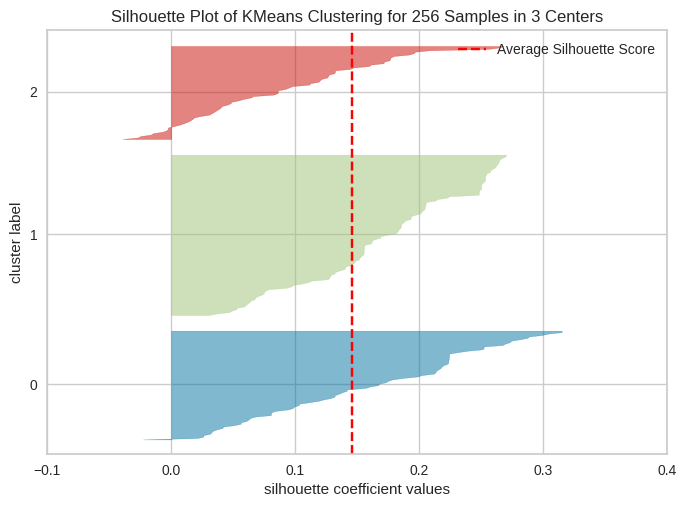

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 256 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, n_init='auto')


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')


visualizer.fit(df_scaled)
visualizer.show()


The silhouette plot for KMeans clustering of 256 samples across 3 centers shows that most positive silhouette scores indicate good alignment of samples within their clusters and separation from neighboring clusters. However, some scores near 0 or negative suggest potential overlap or ambiguity, with a few samples lying near the boundaries between clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

X = df_scaled

kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_


wss = kmeans.inertia_


silhouette_avg = silhouette_score(X, labels)


print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 2515.9177492670883
Average Silhouette Score: 0.15157781280291405




1.   WSS: 2515.92  The low WSS suggests good compactness within clusters, with points relatively close to their respective centroids.
2.   Average Silhouette Score: 0.152  The low silhouette score indicates that the clusters may not be well-separated, suggesting possible overlap or ambiguity between clusters.



 K=4

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(60)

kmeans = KMeans(n_clusters=4, random_state=60, n_init='auto')
kmeans_result = kmeans.fit(scaled_features)

print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-0.0949158   0.71887118  0.81281322  0.52175351  0.85886165 -0.079275
  -0.46341789 -0.23668467 -0.27270851 -0.78620176 -0.2960117   1.60875781
   0.22892414]
 [ 0.14953971 -0.57641596 -0.46080291  0.13106378 -0.47627492  0.5810849
   0.28658781  0.04821183  0.12123058  0.29327804 -0.25185144 -0.43914076
   0.3293099 ]
 [-0.36037137  0.76162442  0.94094141  0.38021894  1.13971181  0.47623849
   0.09854986  0.16746971  0.83678012  0.23987126  0.14666791  0.33274913
  -1.65821188]
 [ 0.01854677  0.12860721 -0.29615838 -0.89299275 -0.43721525 -1.45416743
  -0.3281828  -0.05240786 -0.64799348 -0.21896866  0.60851211 -0.45885444
   0.35000799]]

Cluster Labels:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 3 1 1 1 1 2 1 1 2 1 0 1 1 3 1
 2 0 2 2 1 0 3 1 3 0 3 3 1 3 1 1 3 3 1 3 3 1 1 3 1 3 1 1 3 3 2 2 0 2 3 0 1
 3 1 1 0 3 0 1 2 2 3 0 1 1 2 1 2 3 0 1 2 1 1 3 3 2 2 1 3 3 1 1 2 2 2 0 0 3
 3 3 0 2 1 1 1 1 1 2 1 1 0 3 3 1 2 1 3 1 2 0 3 0 2 1 3 0 1 2 0 1 0 0 1 2 2
 0 3 1 0 1 1 3 2

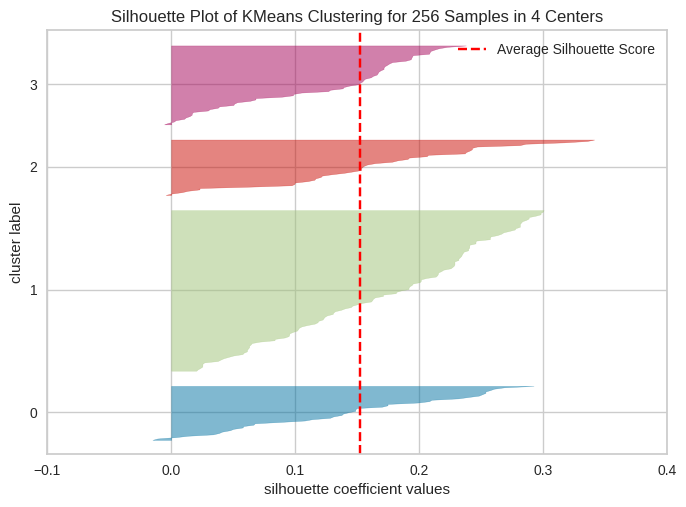

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 256 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, n_init='auto')


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

From the silhouette plot of KMeans clustering for 256 samples in 4 centers, the positive values of most Silhouette scores indicate that the samples are well-aligned with their clusters and sufficiently separated from neighboring clusters. However, this does not necessarily mean that the clustering is perfect, as there may be overlap or ambiguity between clusters, especially in the first cluster, which contains Silhouette scores close to 0 or negative values.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


X = df_scaled

kmeans = KMeans(n_clusters=4, random_state=60, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

wss = kmeans.inertia_


silhouette_avg = silhouette_score(X, labels)


print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 2348.4634232330413
Average Silhouette Score: 0.15241061352492832




1.  WSS: 2348.46  This low WSS value suggests that the clusters are compact, with data points close to their cluster centers.
2.   Average Silhouette Score: 0.152  The low silhouette score indicates that the clusters are not very well-separated, and there might be some overlap or ambiguity between clusters.



K=10

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


np.random.seed(90)

kmeans = KMeans(n_clusters=10, random_state=90, n_init='auto')
kmeans_result = kmeans.fit(scaled_features)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-0.49691213  0.71505227  0.94094141  0.52774207  1.25504428  0.44300738
   0.22866755 -0.49223909  0.84541483 -0.02456351  0.00791475  1.00451303
  -1.50186258]
 [ 0.0457002   0.13137101  0.27657301 -0.83188341 -0.66196846 -0.58786054
   0.42625368 -0.24095647 -0.40459309  0.18825751  1.90709426 -0.45275259
   0.35000799]
 [-0.1042902  -0.22128939 -0.76743449 -1.20894105 -0.66196846  0.4742458
   0.42625368 -0.12704168  0.48702095  0.3247842  -0.64438703 -0.45275259
   0.26031625]
 [ 0.158193   -1.42354077 -0.31122047  0.78089494 -0.41508046  0.58751238
   0.51703649  0.53573525 -0.46876228 -0.1871909  -0.54290766 -0.48693682
   0.35000799]
 [ 0.2706858   0.6443316   0.6562121  -0.07776814 -0.50103406 -0.66956103
   0.42625368 -0.29791386 -0.55319543 -0.01653253 -0.59532008  0.69744635
   0.35000799]
 [ 0.4521258  -0.09718603 -0.42300386  0.82717019 -0.59188413  0.49532979
  -0.27365253 -0.23544446  1.08143031  0.61545394  0.11852487 -0.54122943
   0.19377077]
 [-0.4

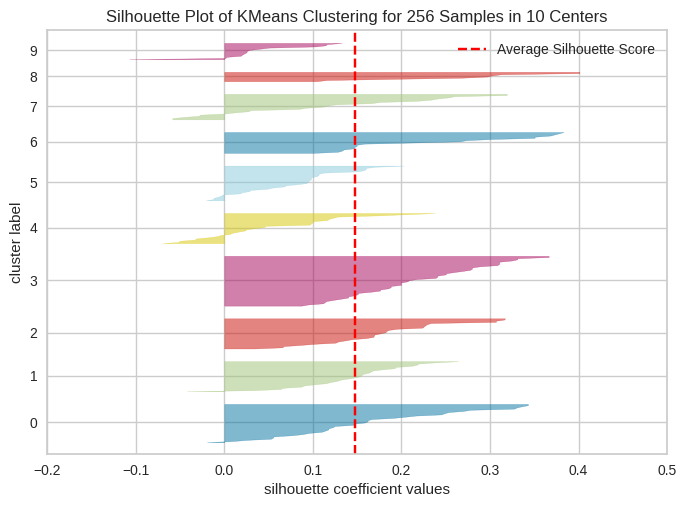

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 256 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=10, n_init='auto')


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

From the silhouette plot of KMeans clustering for 256 samples in 10 centers, most positive Silhouette values indicate that the samples fit well within their clusters and are distant from other clusters, suggesting that the clustering effectively separated the data into distinct groups.

However, this does not mean the clustering is perfect, as there is some overlap or ambiguity between clusters, shown by samples with scores close to 0 or negative, indicating that some samples may lie near cluster boundaries.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


X = df_scaled


kmeans = KMeans(n_clusters=10, random_state=90, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_


wss = kmeans.inertia_


silhouette_avg = silhouette_score(X, labels)


print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 1790.5827176054447
Average Silhouette Score: 0.1479657232194208




1.   WSS: 1790.58  This low WSS value indicates good compactness within clusters, with data points close to their respective centers.
2.   Average Silhouette Score: 0.148  The low silhouette score suggests weak separation between clusters, with possible overlap or ambiguity.



### Evaluate the best models of Clustring:

In [ ]:
import pandas as pd


data = {
    'K=3': [2515.9177492670883,0.15157781280291405],
    'K=4': [2348.4634232330413,0.15241061352492832],
    'K=10': [1790.5827176054447,0.1479657232194208]
}



df = pd.DataFrame(data, index=['WSS', 'Average Silhouette Score'])


df


,K=3,K=4,K=10
WSS,2515.917749,2348.463423,1790.582718
Average Silhouette Score,0.151578,0.152411,0.147966


Based on the attached table, we observe the following values for WSS and Average Silhouette Score with different values of K:

For K=3:
WSS = 2515.92: Indicates moderate compactness within clusters, with a relatively high value compared to other options.
Average Silhouette Score = 0.1516: A low score, suggesting that cluster separation is not very clear and there may be some overlap.

--------------------------------------------------------------------------------
For K=4:
WSS = 2348.46: Lower than the value for K=3, indicating improved compactness within clusters.
Average Silhouette Score = 0.1524: Slightly higher than  K=3, indicating a minor improvement in cluster separation, though still relatively weak.

--------------------------------------------------------------------------------
For K=10:
WSS = 1790.58: The lowest value, indicating the greatest compactness within clusters.
Average Silhouette Score = 0.1480: A low score, suggesting that cluster separation is not very clear, with possible overlap or ambiguity.

------------------------------------------------------------------------
**Final Evaluation:** Although K=10 achieved the lowest WSS value, indicating better compactness within clusters, its Average Silhouette Score was also lower, suggesting that cluster separation may not be very clear.
K=4 provides a better balance between the two values, with a lower WSS compared to K=3 and a slightly higher Silhouette Score, making it a reasonable choice for distinguishing between clusters.






